<a href="https://colab.research.google.com/github/Sathvika25/DiabInsight/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
df = pd.read_csv("/content/diabetes.csv")
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Feature variables
X = df.drop(['Outcome'], axis=1)
# Target variable
y = df.Outcome

In [4]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create Decision Tree classifier object
model = DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [6]:
# Train Decision Tree Classifier
model = model.fit(X_train, y_train)

In [7]:
# Predict the response for test dataset
y_pred = model.predict(X_test)


In [8]:
# Evaluation using Accuracy score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 77.27272727272727


In [9]:
# Function to predict diabetes
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]])
    prediction = model.predict(input_data)
    if prediction[0] == 0:
        return "The person is not likely to have diabetes"
    else:
        return "The person is likely to have diabetes"


In [10]:
# Example usage of the function
print(predict_diabetes(6, 148, 72, 35, 0, 33.6, 0.627, 50))

The person is likely to have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
# Correlation analysis
correlation_matrix = df.corr()

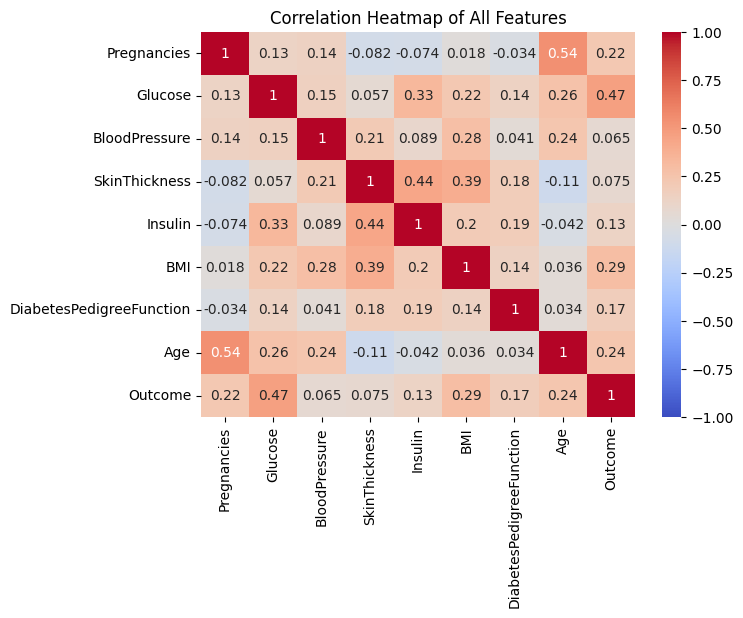

In [12]:
# Create a heatmap for all features
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [13]:
# Correlation with Outcome
outcome_correlation = correlation_matrix['Outcome'].sort_values(ascending=False)
print("Correlation with Outcome:")
print(outcome_correlation)

Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


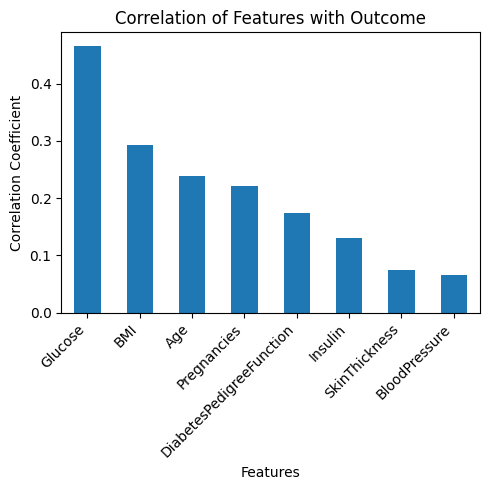

In [14]:
# Bar plot for correlation with Outcome
plt.figure(figsize=(5, 5))
outcome_correlation.drop('Outcome').plot(kind='bar')
plt.title('Correlation of Features with Outcome')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()